<a href="https://colab.research.google.com/github/selva-vignesh/DFT_Using_Python/blob/main/DFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fourier Transform (FT) simulation




####<u><b>Fourier Transform:</b></u>
#####Fourier transforms <b>(FT)</b> take a signal and express it in terms of the frequencies of the waves that make up that signal.
<div align = "center">
  <img src="https://www.nti-audio.com/portals/0/pic/news/FFT-Time-Frequency-View-540.png">
  <p><i>Simple representation of FT</i></p>
  <br>
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from google.colab import output
output.enable_custom_widget_manager()

from ipywidgets import interact, interactive
import ipywidgets as widgets

from IPython.core.display import display, HTML
import os

In [ ]:
def plotit(x, y, n, subplot, title, xlab, mkr):
    '''To plot the signal'''

    plt.figure(figsize = (20,15))
    plt.subplot(4,1,subplot)
    plt.grid(True, which='both')
    plt.ylabel("Amplitude(A)")
    plt.xlabel(xlab)
    plt.title(title)
    plt.axhline(y=0, lw=0.5, color='k')
    plt.axvline(x=0, lw=0.5, color='k')

    clr = ['b', 'r', 'g']
    for i in range(n):
      plt.plot(x, y[i], color = clr[subplot-1], marker = mkr)

    plt.show()

In [ ]:
def fft(add_sig, n, ref_amp):
    '''To do FT using reference sine waves and combined sine wave'''
    
    fft_sine_val =[]
    fft_cos_val = []

    print("  Freq\t|  Sine Block\t|  Cosine Block")
    print("=====================================")
    for f in range(n):
        
        fft_sine_sum = fft_cos_sum = 0

        #Ref. Signals
        ref_sine = ref_amp * np.sin(2 * np.pi * f * x / Fs)
        ref_cos = ref_amp * np.cos(2 * np.pi * f* x /Fs )

        for i in range(Fs):
            
            fft_sine_sum += ref_sine[i] * add_sig[i]
            fft_cos_sum += ref_cos[i] * add_sig[i]

        fft_sine_val.append(round(fft_sine_sum))
        fft_cos_val.append(round(fft_cos_sum))
        
        if fft_sine_sum > 1 or fft_cos_sum > 1:
          print("=====================================")
          print("  {:.1f}\t|  {:+.4f}\t|  {:+.4f}".format(f, fft_sine_sum, fft_cos_sum))
          print("=====================================")
        
        else:
          print("  {:.1f}\t|  {:+.4f}\t|  {:+.4f}".format(f, fft_sine_sum, fft_cos_sum))

    return fft_sine_val, fft_cos_val

In [ ]:
def single_freq_fft(add_sig, int_freq, ref_amp):
    '''To test ft with different freq'''

    sine_prod =[]
    cos_prod = []
    int_ref_sine = ref_amp * np.sin(2 * np.pi * int_freq * x / Fs)
    int_ref_cos = ref_amp * np.cos(2 * np.pi * int_freq * x / Fs)

    for i in range(Fs):
            sine_prod.append(int_ref_sine[i] * add_sig[i])
            cos_prod.append(int_ref_cos[i] * add_sig[i])

    return [sine_prod, cos_prod], [int_ref_sine, int_ref_cos]

In [ ]:
def plt_comp(x, prod, ref_sig, add_sig, title):
    '''Plot to compare waves'''

    plt.figure(figsize = (30,10))
    plt.plot(x, prod, 'b', c = 'r', linestyle='solid', label='amp_contribution', linewidth=3.0)
    plt.plot(x, ref_sig,c = 'g', label='ref_wave', linewidth=0.5)
    plt.plot(x, add_sig, '--b',c = 'b', label='add_sig_wave', linewidth=1)

    plt.grid(True, which='both')
    plt.ylabel("Amplitude(A)")
    plt.xlabel("Samples (N)")
    plt.title(title)
    plt.axhline(y=0, lw=1, color='k')
    plt.axvline(x=0, lw=1, color='k')
    leg = plt.legend(loc ="upper right");

    plt.show()

#Create Input Sine waves.
By default, Two sine waves generated at two different frequencies with unit amplitude,
*   Freq = 5 Hz, Amplitude = 1
*   Freq = 10 Hz, Amplitude = 1

These two sine waves added together to make a combined time domain signal that consists of two different frequency signals.





In [ ]:
# Sampling frequency
Fs = 1000
x = np.arange(Fs)

def create_wave(s1, freq1, amp1, s2, freq2, amp2):
  
    global sig1, sig2, add_sig

    # Sin/Cos Signal1
    if s1 == 'sin':
      sig1 = amp1 * np.sin(2 * np.pi * freq1 * x / Fs)
    else:
      sig1 = amp1 * np.cos(2 * np.pi * freq1 * x / Fs)
    
    # Sin/Cos Signal2
    if s2 == 'sin':
       sig2 = amp2 * np.sin(2 * np.pi * freq2 * x / Fs)
    else:
       sig2 = amp2 * np.cos(2 * np.pi * freq2 * x / Fs)
    
    # Combined Sine signal
    add_sig = sig1 + sig2

    # Plot Sine wave1
    txt1 = "<Sig1>: "+str(freq1)+ " Hz freq"
    plotit(x, [sig1], 1, 1, txt1, "Sample (N)", '')

    # Plot Sine wave2
    txt2 = "<Sig2>:"+str(freq2)+ " Hz freq"
    plotit(x, [sig2], 1, 2, txt2, "Sample (N)", '')

    # Plot Combined Sine wave
    plotit(x, [add_sig], 1, 3, "<Combined Wave (Sig1 + Sig2)>", "Sample (N)", '')

In [ ]:
interactive_plot = interactive(
                      create_wave, 
                      {'manual': True, "manual_name":"Click here to Plot!"},
                      s1 = widgets.RadioButtons( options=['sin', 'cos'], value='sin', description="<b> Signal1: </b>"),
                      freq1= widgets.IntSlider(value=5, min=0, max=25, description='Freq(Hz)'), 
                      amp1 = widgets.IntSlider(value=1, min=0, max=5, description='Amplitude'),
                      s2 = widgets.RadioButtons( options=['sin', 'cos'], value='sin', description='<b> Signal2: </b>'), 
                      freq2= widgets.IntSlider(value=10, min=0, max=25, description='Freq(Hz)'), 
                      amp2 = widgets.IntSlider(value=1, min=0, max=5, description='Amplitude'),
                      )
output = interactive_plot.children[-1]
interactive_plot

interactive(children=(RadioButtons(description='<b> Signal1: </b>', options=('sin', 'cos'), value='sin'), IntS…


> If any error on running below cells, click the above "Click here to plot it!" button.




##Calculating DFT
Applying FT to the combined signal wave to find the frequency components in it. 



### Lets expand the above DFT formula:
<img src="https://i.ibb.co/y8kGPKc/dft2.png" alt="dft-formula" width="600">

##### From the above equation, we have two blocks.


*   Red - Cosine block
*   Blue - Sine block



In [ ]:
num_freq = 25
ref_amp = 1

# FT
fft_sine_val, fft_cos_val = fft(add_sig, num_freq, ref_amp)

  Freq	|  Sine Block	|  Cosine Block
  0.0	|  +0.0000	|  +0.0000
  1.0	|  -0.0000	|  -0.0000
  2.0	|  -0.0000	|  -0.0000
  3.0	|  +0.0000	|  -0.0000
  4.0	|  -0.0000	|  +0.0000
  5.0	|  +500.0000	|  -0.0000
  6.0	|  -0.0000	|  -0.0000
  7.0	|  +0.0000	|  -0.0000
  8.0	|  +0.0000	|  +0.0000
  9.0	|  +0.0000	|  -0.0000
  10.0	|  +500.0000	|  +0.0000
  11.0	|  -0.0000	|  -0.0000
  12.0	|  +0.0000	|  -0.0000
  13.0	|  +0.0000	|  -0.0000
  14.0	|  +0.0000	|  +0.0000
  15.0	|  -0.0000	|  +0.0000
  16.0	|  -0.0000	|  -0.0000
  17.0	|  -0.0000	|  -0.0000
  18.0	|  +0.0000	|  -0.0000
  19.0	|  -0.0000	|  -0.0000
  20.0	|  +0.0000	|  -0.0000
  21.0	|  +0.0000	|  +0.0000
  22.0	|  -0.0000	|  +0.0000
  23.0	|  -0.0000	|  -0.0000
  24.0	|  +0.0000	|  -0.0000


###Observation:


*   From the above ft output, the values are greater than 0 (or equal to ft
_sum) at the freq 5 Hz and 10 Hz. 

* ##### i.e ft_sum = (A x N)/2
> where, A = Amplitude of the signal, N = no.of Samples

*   For the other frequencies (that are not in the combined signal),  the value is 0 or negative.





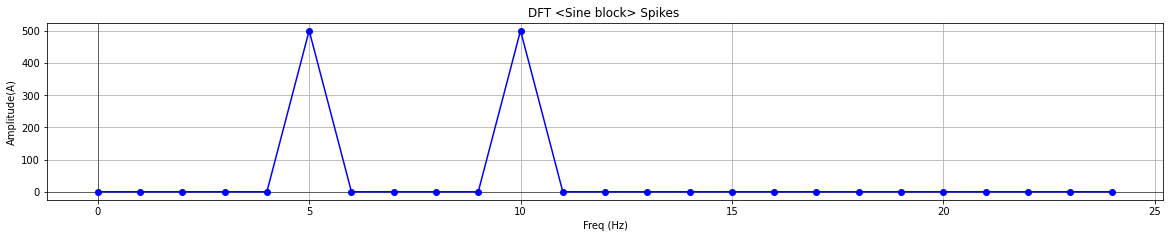

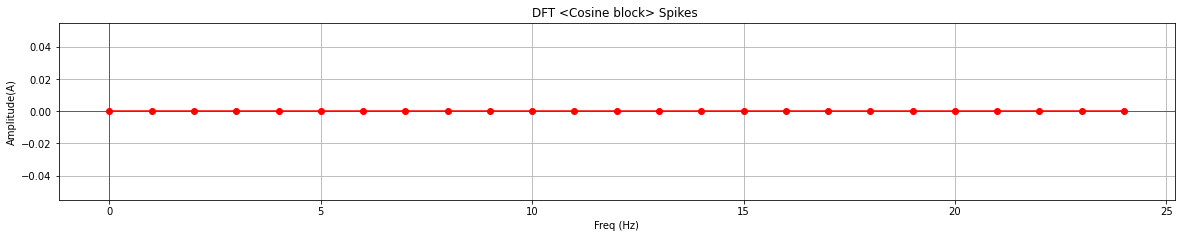

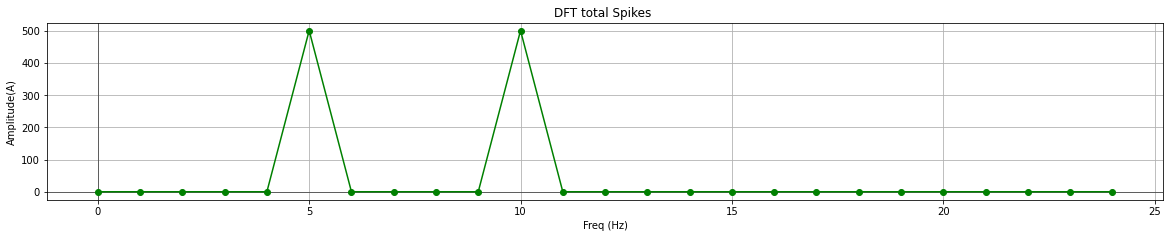

In [ ]:
#Plot the FFT values 
a = np.arange(0, num_freq, 1, dtype=int)
plotit(a, [fft_sine_val], 1, 1, "DFT <Sine block> Spikes ", 'Freq (Hz)', 'o')
plotit(a, [fft_cos_val], 1, 2, "DFT <Cosine block> Spikes ", 'Freq (Hz)', 'o')

fft_tot_val = []
for i in range(len(fft_sine_val)):
    fft_tot_val.append( fft_cos_val[i] + fft_sine_val[i] )

plotit(a, [fft_tot_val], 1, 3, "DFT total Spikes ", 'Freq (Hz)', 'o')

### Case 1: 
#####If the ref. signal freq is present in combined wave.
#####Lets take reference sine signal of freq 5 Hz and do ft.

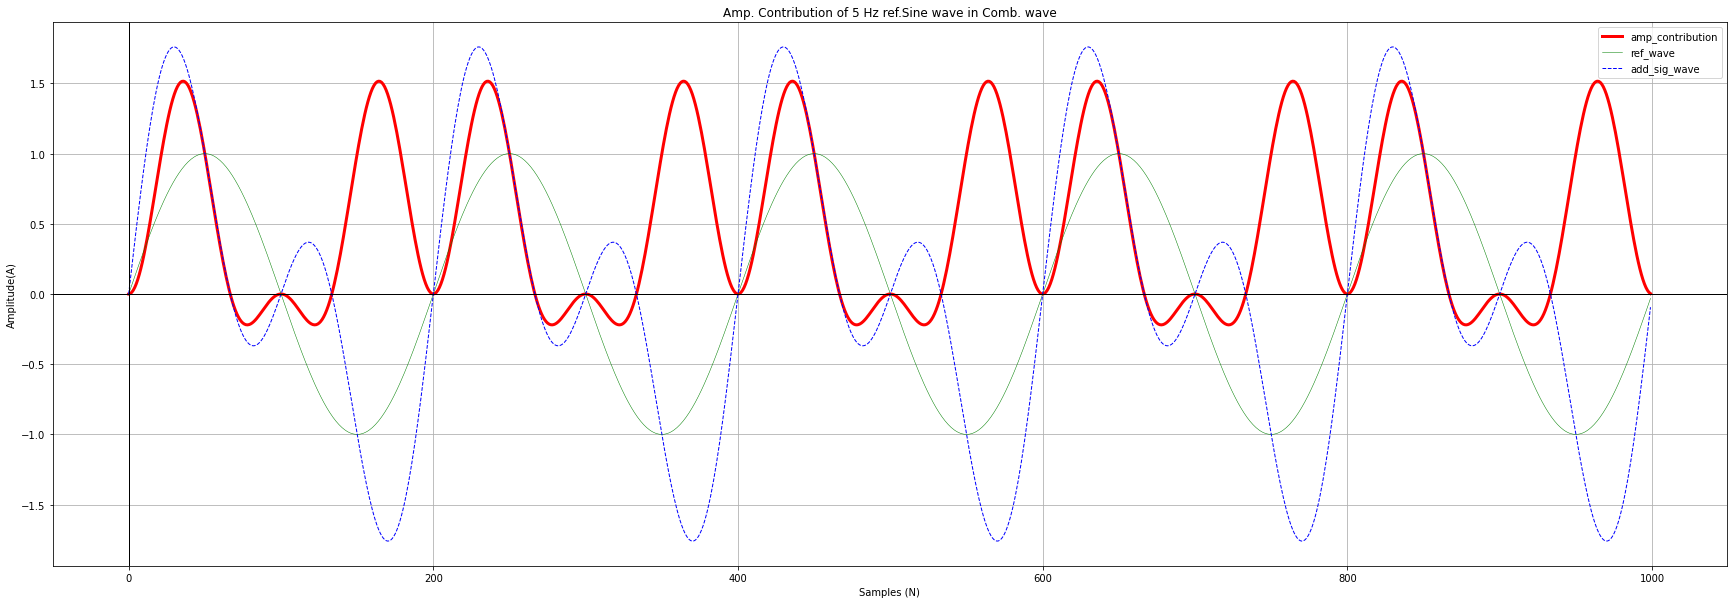

In [ ]:
# Reference sine signal of Freq 5 Hz (Our Interested Freq)
int_freq = 5
ref_amp = 1

prod, ref_sine = single_freq_fft(add_sig, int_freq, ref_amp)
plt_comp(x, prod[0], ref_sine[0], add_sig, "Amp. Contribution of 5 Hz ref.Sine wave in Comb. wave")

###Observation:

> <b>Green Plot</b> - Reference wave<br>
<b>Blue Plot</b> - Combined Wave<br>
<b>Red plot</b> - Amplitude contribution of the ref wave in the combined wave (the product of ref wave and combined wave at each sample)

Red Plot is mostly on positive because the ref. wave is present in the combined wave. So adding up the values of red plot, it gives 500 (A x N /2). 

###Case 2:
If the ref. signal freq is not present in combined wave
##### Lets take another ref sine signal of freq 7 Hz and do ft.

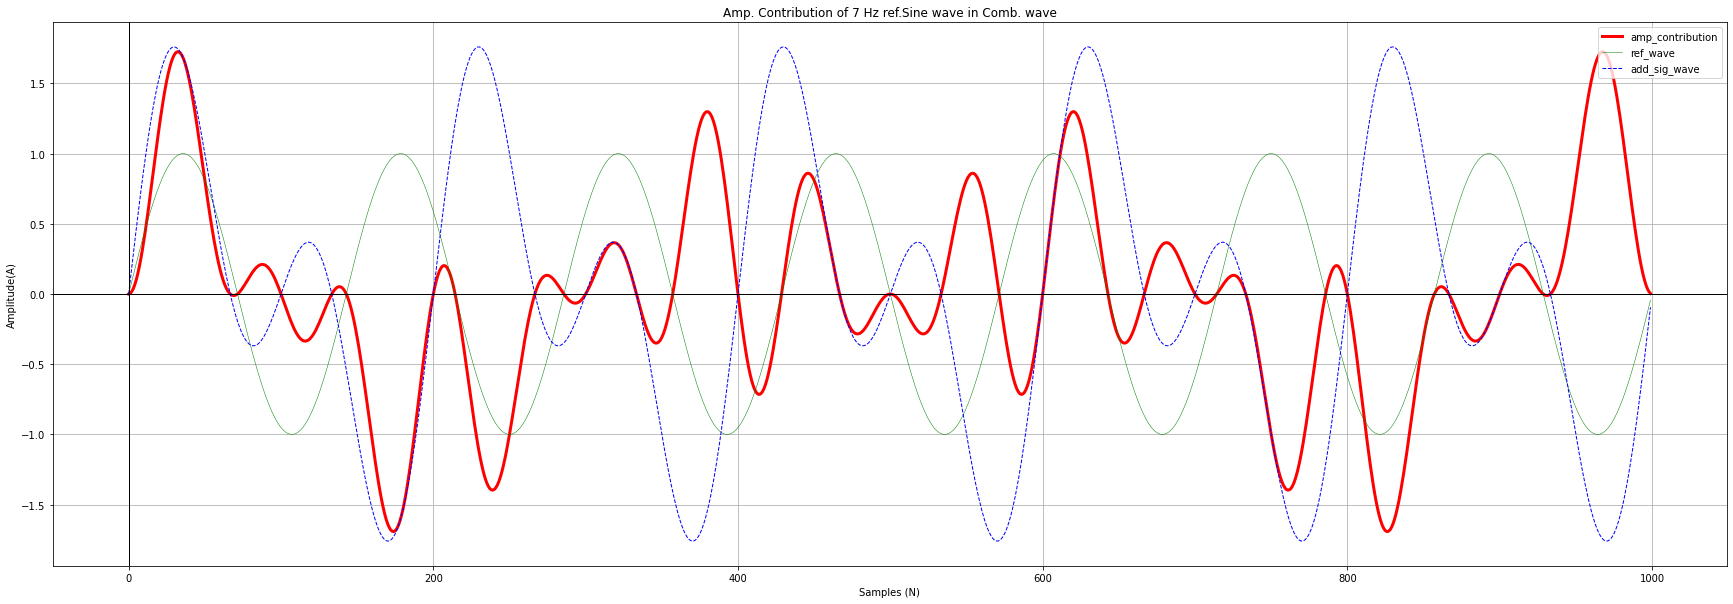

In [ ]:
# Reference singnal of Freq 7 Hz (Not Our Interested Freq)
not_int_freq = 7
ref_amp = 1
prod, ref_sine = single_freq_fft(add_sig, not_int_freq, ref_amp)
plt_comp(x, prod[0], ref_sine[0], add_sig, "Amp. Contribution of 7 Hz ref.Sine wave in Comb. wave")

###Observation:

> <b>Green Plot</b> - Reference wave<br>
<b>Blue Plot</b> - Combined Wave<br>
<b>Red plot</b> - Amplitude contribution of the ref wave in the combined wave (the product of ref wave and combined wave at each sample)

Red plot has both positive and negative peaks periodically. So adding up the values gives zero or negative.

---
[END]
